# Description
Company XYZ sells a software for 39 dollars. Since revenue has been ﬂat for some time, the VP of Product has decided to run a test increasing the price. She hopes that this would increase revenue. In the experiment, 66% of the users have seen the old price (39 dollars), while a random sample of 33% users a higher price (59 dollars). <br>
The test has been running for some time and the VP of Product is interested in understanding how it went and whether it would make sense to increase the price for all the users. <br>
Especially he asked you the following questions: <br>
1. Should the company sell its software for 39 or 59? <br>
2. The VP of Product is interested in having a holistic view into user behavior, especially focusing on actionable insights that might increase conversion rate. What are your main ﬁndings looking at the data? <br>
3. [Bonus] The VP of Product feels that the test has been running for too long and he should have been able to get statistically signiﬁcant results in a shorter time. Do you agree with her intuition? After how many days you would have stopped the test? Please, explain why.


# Methodology:
1. Input Packages & Data
2. Data Cleaning
3. EDA
4. Q1
5. Q2
---



# 1. Input Packages & Data

In [126]:
# input packages
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
# show multiple lines
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity='all'

In [129]:
# import csv as df
df_test = pd.read_csv('/content/drive/My Drive/1 - Data Science Project/Take Home Challenge/Price Test/test_results.csv')
df_user = pd.read_csv('/content/drive/My Drive/1 - Data Science Project/Take Home Challenge/Price Test/user_table.csv')
df_test.head()
df_user.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [130]:
# show unique values for each col:
for column in df_test.columns:
    uniques = sorted(df_test[column].unique())
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

df_test.info()
df_test.isnull().sum()
df_test.describe()

user_id              316800	 [3, 9, 14, 16, 19]
timestamp            140931	 ['2015-03-02 00:04:12', '2015-03-02 00:12:40', '2015-03-02 00:16:25', '2015-03-02 00:18:46', '2015-03-02 00:22:21']
source                  12	 ['ads-bing', 'ads-google', 'ads-yahoo', 'ads_facebook', 'ads_other']
device                   2	 ['mobile', 'web']
operative_system         6	 ['android', 'iOS', 'linux', 'mac', 'other']
test                     2	 [0, 1]
price                    2	 [39, 59]
converted                2	 [0, 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           316800 non-null  int64 
 1   timestamp         316800 non-null  object
 2   source            316800 non-null  object
 3   device            316800 non-null  object
 4   operative_system  316800 non-null  object
 5   test              316800 non-null  int64 

user_id             0
timestamp           0
source              0
device              0
operative_system    0
test                0
price               0
converted           0
dtype: int64

,user_id,test,price,converted
count,316800.000000,316800.000000,316800.000000,316800.000000
mean,499281.341840,0.360079,46.205051,0.018333
std,288591.154044,0.480024,9.601487,0.134154
min,3.000000,0.000000,39.000000,0.000000
25%,249525.750000,0.000000,39.000000,0.000000
50%,499021.500000,0.000000,39.000000,0.000000
75%,749025.500000,1.000000,59.000000,0.000000
max,1000000.000000,1.000000,59.000000,1.000000


In [131]:
# show unique values for each col:
for column in df_user.columns:
    uniques = sorted(df_user[column].unique())
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

df_user.info()
df_user.isnull().sum()
df_user.describe()

user_id              275616	 [3, 9, 14, 16, 19]
city                   923	 ['Abilene', 'Akron', 'Alameda', 'Albany', 'Albuquerque']
country                  1	 ['USA']
lat                    713	 [19.7, 21.32, 25.67, 25.7, 25.71]
long                   830	 [-157.8, -155.09, -149.19, -123.28, -123.11]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275616 entries, 0 to 275615
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  275616 non-null  int64  
 1   city     275616 non-null  object 
 2   country  275616 non-null  object 
 3   lat      275616 non-null  float64
 4   long     275616 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.5+ MB


user_id    0
city       0
country    0
lat        0
long       0
dtype: int64

,user_id,lat,long
count,275616.000000,275616.000000,275616.000000
mean,499245.801521,37.111680,-93.981772
std,288533.458944,5.209627,18.086486
min,3.000000,19.700000,-157.800000
25%,249544.500000,33.660000,-112.200000
50%,498861.000000,37.740000,-88.930000
75%,748856.500000,40.700000,-78.910000
max,999999.000000,61.180000,30.310000


## Findings:

1. No null value appear in this dataset
2. need to validate lat long data

# 2. Data Cleaning

In [132]:
# Merge 2 tables
df = pd.merge(left = df_test, right = df_user, how = 'left', on = 'user_id')
df.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02
...,...,...,...,...,...,...,...,...,...,...,...,...
316795,17427,2015-04-11 09:29:15,ads_facebook,web,windows,0,39,0,NaN,NaN,NaN,NaN
316796,687787,2015-03-16 23:31:55,direct_traffic,web,windows,0,39,0,Bell Gardens,USA,33.97,-118.15
316797,618863,2015-04-11 01:35:19,ads-google,web,mac,0,39,0,West Seneca,USA,42.84,-78.75
316798,154636,2015-05-14 05:46:42,friend_referral,mobile,android,0,39,0,Walnut Creek,USA,37.90,-122.04


In [133]:
# Create pivot table to check test group
df[['price','test','user_id']].groupby(['price','test']).count()

user_id
price test         
39    0      202517
      1         155
59    0         210
      1      113918

In [134]:
# Check latitude and longitude
BBox = (df.long.min(),   df.long.max(),      
         df.lat.min(), df.lat.max())
BBox

(-157.8, 30.31, 19.7, 61.18)

## Finding:
1. There are some classification errors: <br>
We are supoosed to have only 59 dollars in test group and only 39 dollars in control group. While in both the test and control groups have both price tags<br>
2. Outliers in location data:<br>
 USA's latitude is from 19.50139 to 64.85694 and longitude from -161.75583 to -68.01197. Our dataset includes outliers


## Solution:
Delete errors

In [135]:
# Delete classification errors $ validation
df = df[((df['price'] == 39) & (df['test'] == 0)) | ((df['price'] == 59) & (df['test'] == 1)) ]
df = df[df['long'] <= -68.01197]
df[['price','test','user_id']].groupby(['price','test']).count()
BBox = (df.long.min(),   df.long.max(),      
         df.lat.min(), df.lat.max())
BBox

,,user_id
price,test,
39,0,176030
59,1,98927


(-157.8, -70.08, 19.7, 61.18)

# Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of Source in 2 Groups')

Text(0.5, 1.0, 'Distribution of Device in 2 Groups')

Text(0.5, 1.0, 'Distribution of Operative_system in 2 Groups')

Text(0.5, 1.0, 'Distribution of Device in 2 Groups')

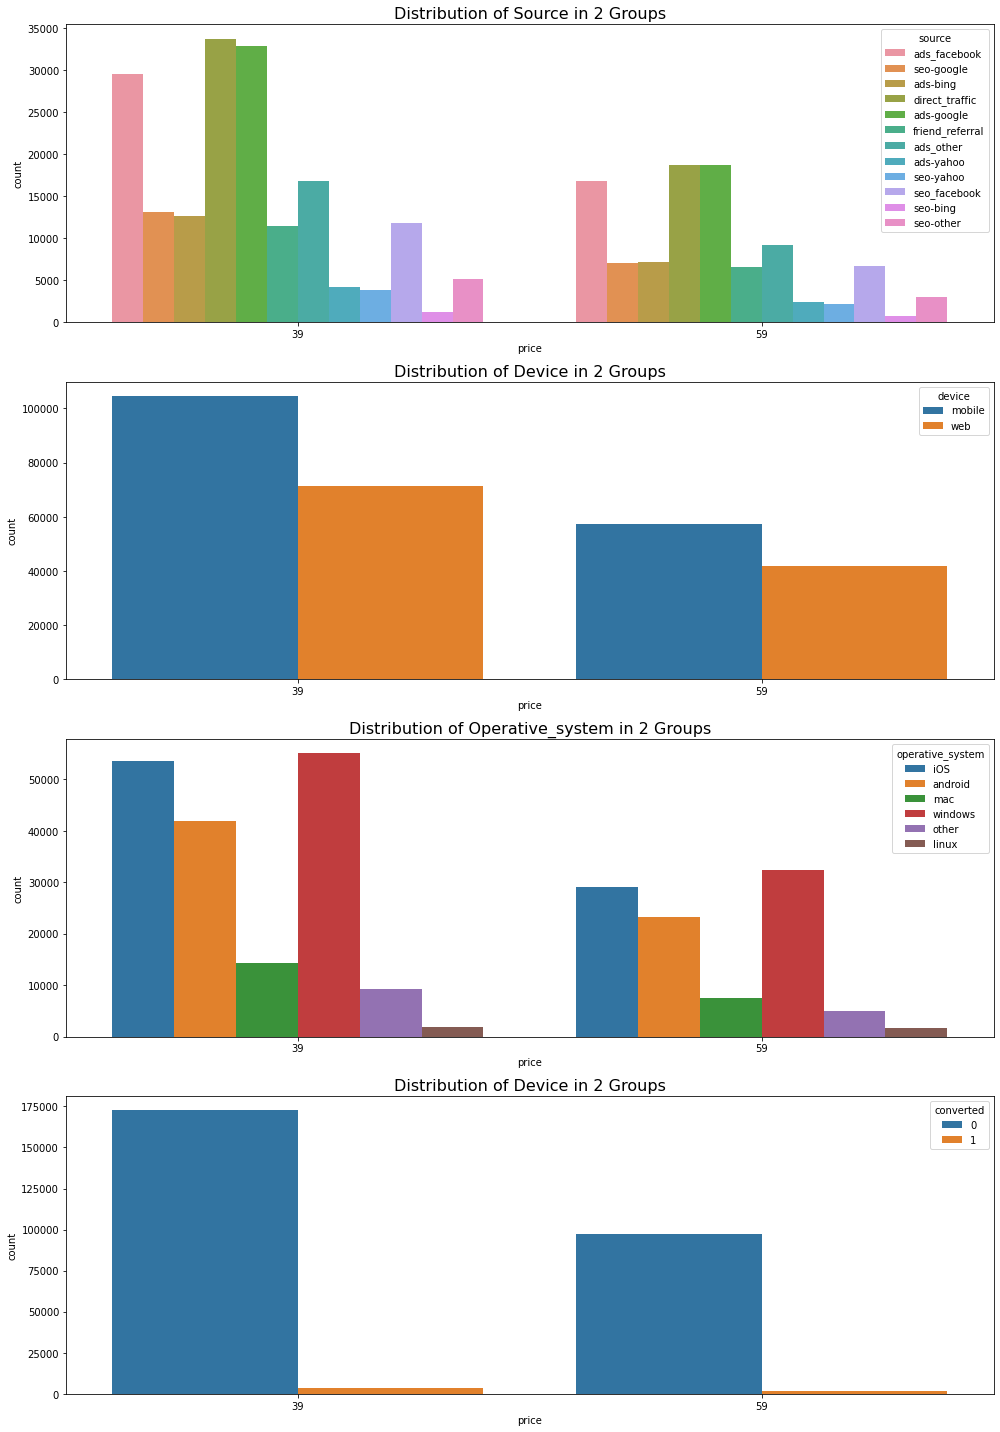

In [136]:
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (14,20))

sns.countplot(x = 'price', hue = 'source', data = df, ax = ax[0])
ax[0].set_title('Distribution of Source in 2 Groups', fontsize = 16)

sns.countplot(x = 'price', hue = 'device', data = df, ax = ax[1])
ax[1].set_title('Distribution of Device in 2 Groups', fontsize = 16)

sns.countplot(x = 'price', hue = 'operative_system', data = df, ax = ax[2])
ax[2].set_title('Distribution of Operative_system in 2 Groups', fontsize = 16)
  
sns.countplot(x = 'price', hue = 'converted', data = df, ax = ax[3])
ax[3].set_title('Distribution of Device in 2 Groups', fontsize = 16)

plt.tight_layout()

plt.show()

In [137]:
# Create revenue col
df['revenue'] = df['converted'] * df['price']
df.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,revenue
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316794,388438,2015-05-20 11:34:44,seo-google,web,windows,1,59,0,Joliet,USA,41.53,-88.12,0
316796,687787,2015-03-16 23:31:55,direct_traffic,web,windows,0,39,0,Bell Gardens,USA,33.97,-118.15,0
316797,618863,2015-04-11 01:35:19,ads-google,web,mac,0,39,0,West Seneca,USA,42.84,-78.75,0
316798,154636,2015-05-14 05:46:42,friend_referral,mobile,android,0,39,0,Walnut Creek,USA,37.90,-122.04,0


Text(0.5, 1.0, 'Distribution of Conversion Rate')

Text(0.5, 1.0, 'Distribution of Revenue')

,test,revenue
0,0,0.771448
1,1,0.910105


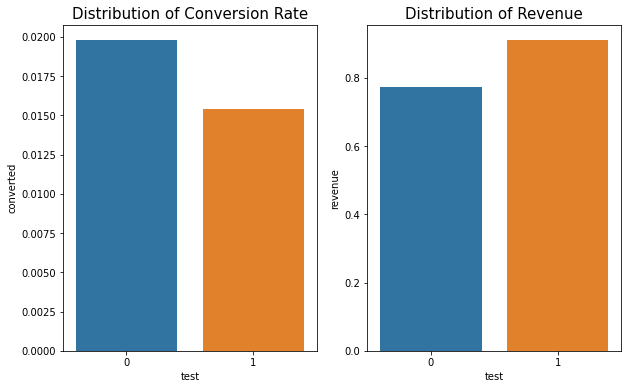

In [138]:
# Viz customer distribution & revenue distribution
data1 = df[['test','converted']].groupby('test').mean().reset_index()
data2 = df[['test','revenue']].groupby('test').mean().reset_index()
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,6))

sns.barplot(x = 'test', y = 'converted', data = data1, ax = ax[0])
ax[0].set_title('Distribution of Conversion Rate', fontsize = 15)

sns.barplot(x = 'test', y = 'revenue', data = data2, ax = ax[1])
ax[1].set_title('Distribution of Revenue', fontsize = 15)

data2

After adjusting price, avg conversion rate goes down while avg revenue increased. <br>
The avg conversion rate is 1.99% when price is 39 dollars, and goes down to 1.55% when setting price to 59 dollars; <br> 
Avg revenue was 0.776 dollars and goes up to 0.917 dollars after increase price.

# 1.Price setting: 39 or 59?

## Why t-test
Let's assume our two groups are independent, while we are not sure if the stanfard deviations are the same. So using t-test for comparison. 

In [139]:
# before run t-tet should I check variance, avg ..
# This test assumes that the populations have identical variances by default

df_control = df[df['test']==0]['revenue'].values
df_test = df[df['test']==1]['revenue'].values
print(ttest_ind(df_test, df_control, axis=0, equal_var=False))

Ttest_indResult(statistic=5.2334504944944795, pvalue=1.6658148828731045e-07)


## Finding:

Even though t-test in scipy is for two tailed test, the one-sided tests can be backed out from the two-sided tests. (With symmetric distributions one-sided p-value is just half of the two-sided pvalue) <br>
Here positive t-stat means positive difference between testing group and control group, in other words, setting price to 59 dollars earns more revenue in this experiment. Then pvalue/2 here is less than 0.05 threshold. We could reject null hypothesis and conclude that increasing price to 59 dollars does boom revenue.

# 2.Coversion Analysis
The VP of Product is interested in having a holistic view into user behavior, especially focusing on actionable insights that might increase conversion rate. What are your main ﬁndings looking at the data?

In [140]:
# Split 'source' by multiple different delimiters

df['Source'] = df["source"].str.split("[-_]", n = 1, expand = True)[0]
df['subsource'] = df["source"].str.split("[-_]", n = 1, expand = True)[1]
df.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,revenue,Source,subsource
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,0,ads,facebook
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,0,seo,google
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,0,ads,bing
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90,0,direct,traffic
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,0,ads,facebook


Text(0.5, 1.0, 'Conversion per source')

Text(0.5, 1.0, 'Conversion per major source')

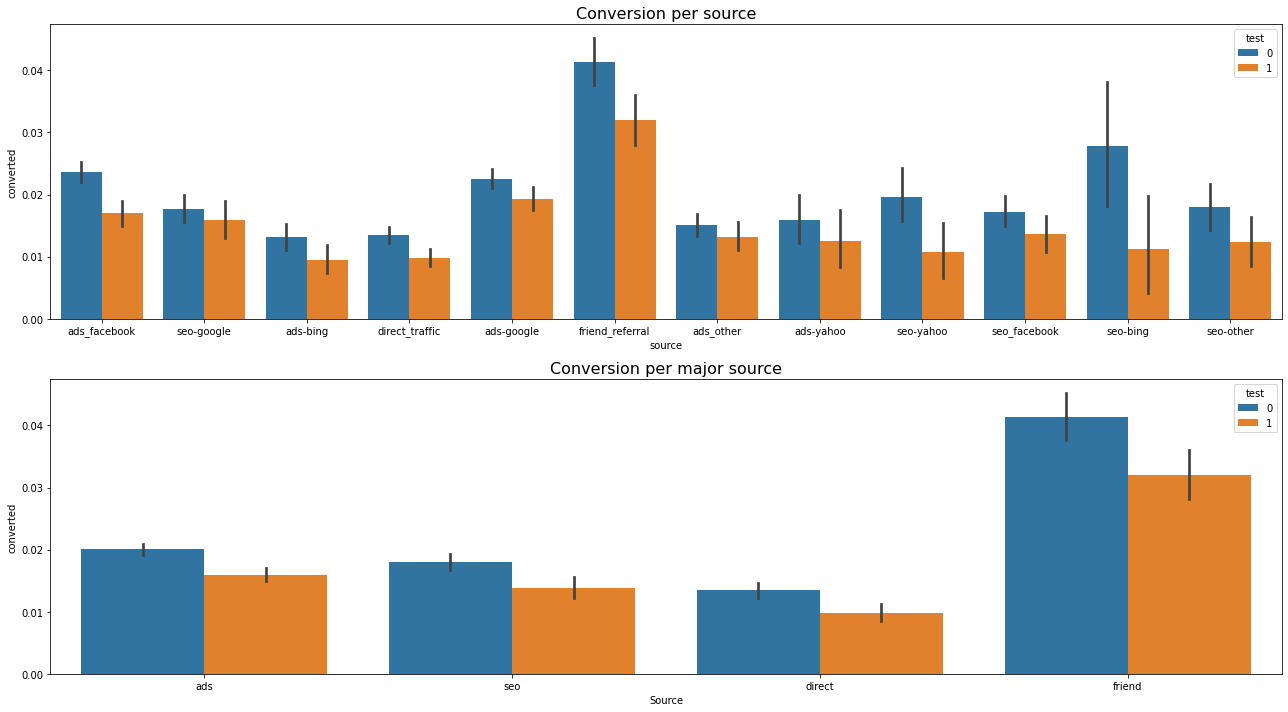

In [141]:
#viz source in different levels

fig, ax = plt.subplots(nrows=2,ncols=1,figsize = (18,10))
sns.barplot(x='source', y='converted', hue='test', data=df,ax = ax[0])
ax[0].set_title('Conversion per source',fontsize = 16)

sns.barplot(x='Source', y='converted', hue='test', data=df,ax = ax[1])
ax[1].set_title('Conversion per major source',fontsize = 16)
plt.tight_layout()
# why hue calculate conversion rate directly in chart?

Text(0.5, 1.0, 'Conversion from Ads')

Text(0.5, 1.0, 'Conversion from SEO')

Text(0.5, 1.0, 'Conversion from Direct Traffic')

Text(0.5, 1.0, 'Conversion from Friends Referral')

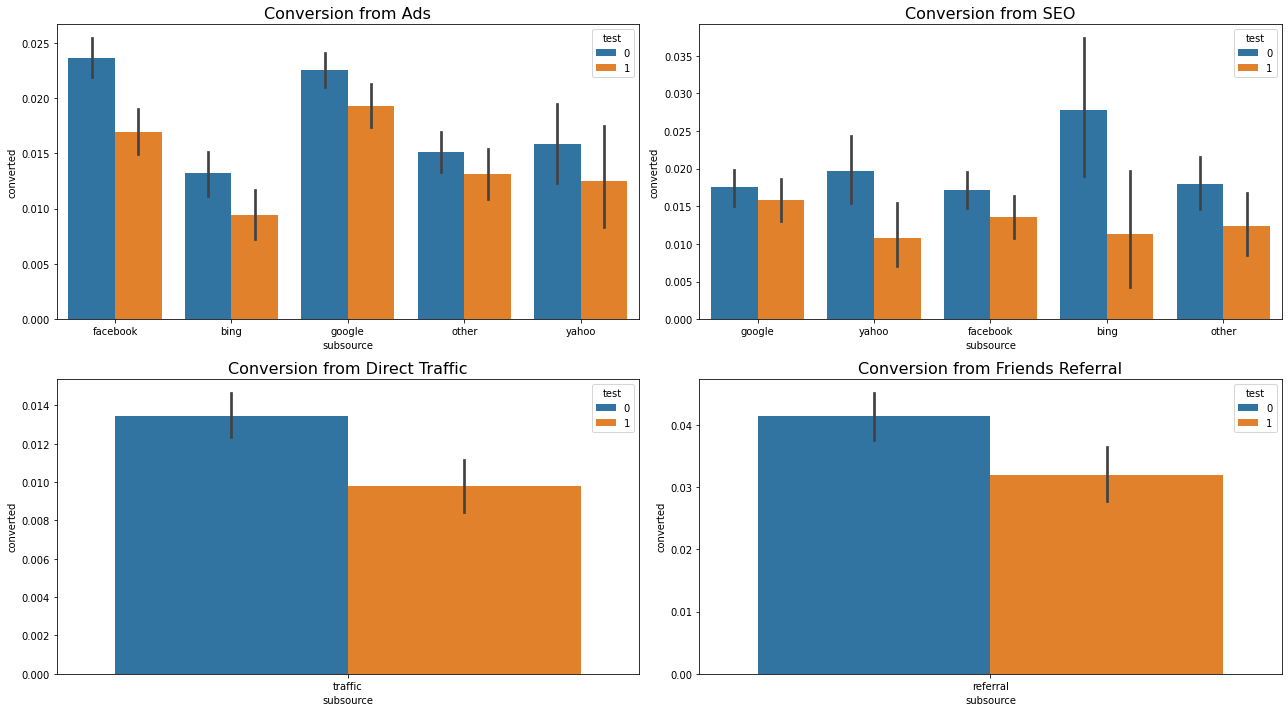

In [142]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize = (18,10))
sns.barplot(x='subsource', y='converted', hue='test', data=df[df['Source']== 'ads'], ax = ax[0,0])
ax[0,0].set_title('Conversion from Ads',fontsize = 16)

sns.barplot(x='subsource', y='converted', hue='test', data=df[df['Source']== 'seo'],ax = ax[0,1])
ax[0,1].set_title('Conversion from SEO',fontsize = 16)


sns.barplot(x='subsource', y='converted', hue='test', data=df[df['Source']== 'direct'],ax = ax[1,0])
ax[1,0].set_title('Conversion from Direct Traffic',fontsize = 16)


sns.barplot(x='subsource', y='converted', hue='test', data=df[df['Source']== 'friend'],ax = ax[1,1])
ax[1,1].set_title('Conversion from Friends Referral',fontsize = 16)
plt.tight_layout()

Text(0.5, 1.0, 'Conversion per device')

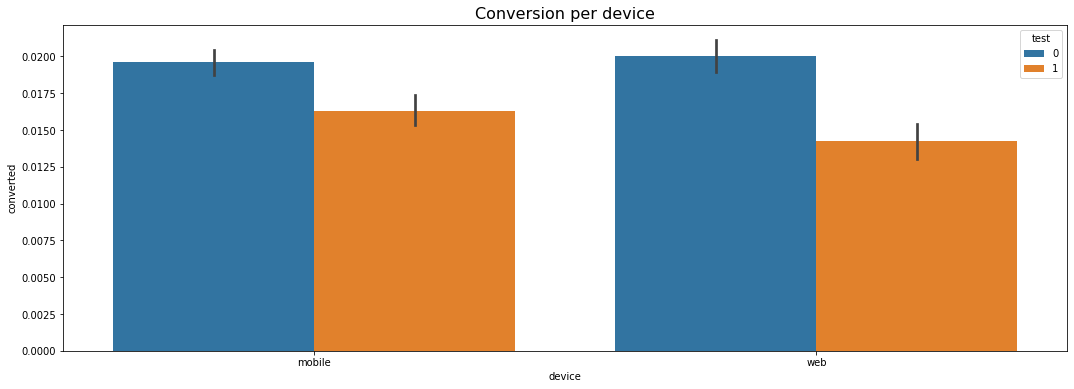

In [143]:
# conversion by device
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (18,6))
sns.barplot(x='device', y='converted', hue='test', data=df)
ax.set_title('Conversion per device',fontsize = 16)

Text(0.5, 1.0, 'Conversion per operative_system')

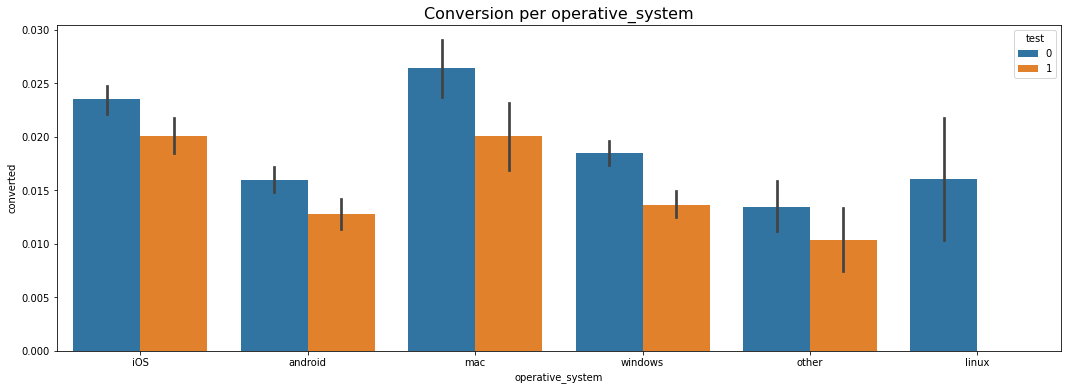

In [144]:
# conversion by operative_system
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (18,6))
sns.barplot(x='operative_system', y='converted', hue='test', data=df)
ax.set_title('Conversion per operative_system',fontsize = 16)


In [145]:
# define bounding box
df1 = df[(df['converted'] == 1) & (df['long']<-68.01197)]
BBox = (df1.long.min(),   df1.long.max(),      
         df1.lat.min(), df1.lat.max())
BBox

(-157.8, -70.08, 19.7, 61.18)

Text(0.5, 1.0, 'Plotting Spatial Data')

(-157.8, -70.08)

(19.7, 61.18)

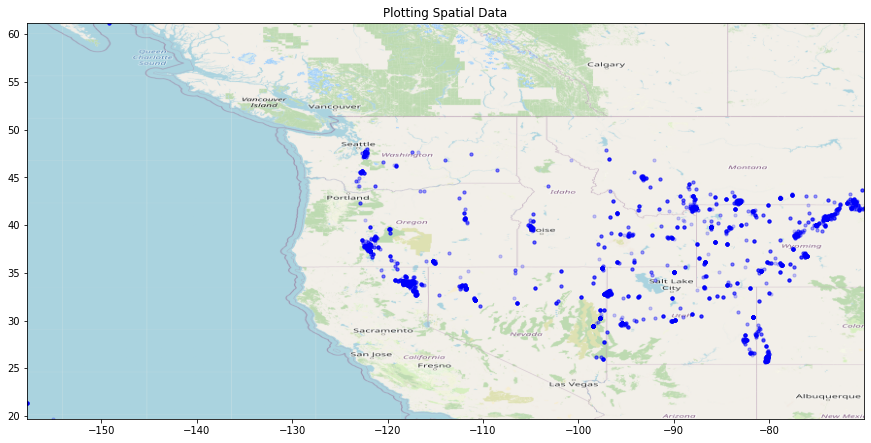

In [150]:
# Conversion by locations
ruh_m = plt.imread('/content/drive/My Drive/1 - Data Science Project/Take Home Challenge/Price Test/map.png')

fig, ax = plt.subplots(figsize = (15,12))
ax.scatter(df1.long, df1.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

## Finding:

1. After changing price, the conversions among most major sources maintain the same trend as before except SEO conversion. <br>
For SEO channel, the source contributed most conversion before changing price was Bing. While performance on this channel drops dramatically after the change. Now Google becomes the biggest contributor. <br>
**Possible reason** could be customers in these channels hold different price sensitivity. To further validate this finding, we could pull customer demographic data, especially the income level, to conduct analysis.<br>
**What can we do:** Put more budget for SEO channel to high-performance sources like google, decrease budget for Bing.<br>

2. Among all the major sources, friend_referral always rank first no matter change price or not, which proved the effectiveness of referral marketing.<br>
**What can we do:** On the one hand, maintaining and improving retention so as to keep our loyal customers; on the other hand, designing referral programs to acquire new and valuable customers leveraging old customers. Promoting these programs on website homepage, offline stores, social streams, newsletter, and platforms which have high conversion rate will offer customers steady exposure.

3. Linux operating system doesn't have conversion when price is setting as 59. 

4. Spatial data visualization shows the customers majorly come from technology centers or densely populated areas: Silicon Valley, Texas, Florida, and the greater New York area. 

# Reference
https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db


 https://www.buyapowa.com/blog/referral-program-examples/

 https://github.com/JifuZhao/DS-Take-Home
